### Librerie

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Carico il dataset

In [10]:
data=pd.read_csv('mushroom_data_all.csv')

In [11]:
#Controllo quanti sono i valori mancanti
print(data.isnull().sum())

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [12]:
#Rapido sguardo al Dataset
pd.options.display.max_columns = None
data.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### Separo il dataset dalle label

In [13]:
data_y = data.class_edible                     # vettore delle labels (variabili dipendenti)
data_x = data.drop(['class_edible'], axis=1)       # rimuovo le variabili dipendenti dal dataframe X

### Mapping fra caratteri e numeri 

In [14]:
labelEncoder_X = LabelEncoder()
data_x['cap-shape']=labelEncoder_X.fit_transform(data_x['cap-shape'])
data_x['cap-surface']=labelEncoder_X.fit_transform(data_x['cap-surface'])
data_x['cap-color']=labelEncoder_X.fit_transform(data_x['cap-color'])
data_x['bruises']=labelEncoder_X.fit_transform(data_x['bruises'])
data_x['odor']=labelEncoder_X.fit_transform(data_x['odor'])
data_x['gill-attachment']=labelEncoder_X.fit_transform(data_x['gill-attachment'])
data_x['gill-spacing']=labelEncoder_X.fit_transform(data_x['gill-spacing'])
data_x['gill-size']=labelEncoder_X.fit_transform(data_x['gill-size'])
data_x['gill-color']=labelEncoder_X.fit_transform(data_x['gill-color'])
data_x['stalk-shape']=labelEncoder_X.fit_transform(data_x['stalk-shape'])
data_x['stalk-root']=labelEncoder_X.fit_transform(data_x['stalk-root'])
data_x['stalk-surface-above-ring']=labelEncoder_X.fit_transform(data_x['stalk-surface-above-ring'])
data_x['stalk-surface-below-ring']=labelEncoder_X.fit_transform(data_x['stalk-surface-below-ring'])
data_x['stalk-color-above-ring']=labelEncoder_X.fit_transform(data_x['stalk-color-above-ring'])
data_x['stalk-color-below-ring']=labelEncoder_X.fit_transform(data_x['stalk-color-below-ring'])
data_x['veil-type']=labelEncoder_X.fit_transform(data_x['veil-type'])
data_x['veil-color']=labelEncoder_X.fit_transform(data_x['veil-color'])
data_x['ring-number']=labelEncoder_X.fit_transform(data_x['ring-number'])
data_x['ring-type']=labelEncoder_X.fit_transform(data_x['ring-type'])
data_x['spore-print-color']=labelEncoder_X.fit_transform(data_x['spore-print-color'])
data_x['population']=labelEncoder_X.fit_transform(data_x['population'])
data_x['habitat']=labelEncoder_X.fit_transform(data_x['habitat'])


#0=edible
#1=poisonous
data_y=labelEncoder_X.fit_transform(data_y) 

### Split fra Train_Set e Test_Set 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2)

## Modello 

Accuracy= 100.0


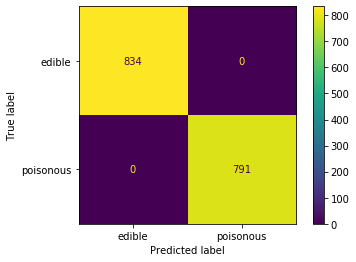

In [17]:
# Gradient Boosting Classifier

gbk = GradientBoostingClassifier()
#Addestramento
gbk.fit(X_train, y_train)
#Validazione
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy=", acc_gbk)


plot_confusion_matrix(gbk, X_test, y_test, values_format='n', display_labels=['edible','poisonous'])
plt.show()